# Pymaceuticals Inc.
---

### Analysis
This assignment was designed to analyze the results of a scientific study that tested the effectiveness of various drugs on reducing tumors in mice. It combined and cleaned up the data, calculated important statistics, and created graphs to visualize the results. The program's main tasks were to identify how different drugs affected tumor size, and to see if there was any relationship between the mice's weight and the tumor size. The following conclusions were drawn from the given data:
- The scatter plot shows a positive correlation between mouse weight and average tumor volume for the Capomulin treatment. This suggests that heavier mice tend to have larger tumors.
- The line plot shows a general decrease in tumor volume, indicating the effectiveness of the Capomulin treatment in reducing tumor size.
- In the box plot both Capomulin and Ramicane show a lower median tumor volume compared to Infubinol and Ceftamin, suggesting they may be more effective in reducing tumor size.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_data = pd.merge(study_results, mouse_metadata, how="left", on=['Mouse ID', 'Mouse ID'])


# Display the data table for preview
combined_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [57]:
# Checking the number of mice.
unique_mouse_count = len(combined_study_data['Mouse ID'].unique())

unique_mouse_count

249

In [58]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice_ids = combined_study_data.loc[duplicate_mice, 'Mouse ID'].unique()

duplicate_mice_ids 

array(['g989'], dtype=object)

In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_study_data.loc[combined_study_data['Mouse ID']==duplicate_mice_ids[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = combined_study_data.loc[combined_study_data['Mouse ID']!='g989']

clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [61]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(clean_study_data['Mouse ID'].unique())
cleaned_mouse_count


248

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_grouping = clean_study_data.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = drug_grouping['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_grouping['Tumor Volume (mm3)'].median()                   
variance_tumor_volume = drug_grouping['Tumor Volume (mm3)'].var()                     
std_dev_tumor_volume = drug_grouping['Tumor Volume (mm3)'].std()                   
sem_tumor_volume = drug_grouping['Tumor Volume (mm3)'].sem()
summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                                   'Median Tumor Volume': median_tumor_volume,
                                   'Tumor Volume Variance': variance_tumor_volume,
                                   'Tumor Volume Std. Dev.': std_dev_tumor_volume,
                                   'Tumor Volume Std. Err.': sem_tumor_volume
                                  })
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [64]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_stats = drug_grouping['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

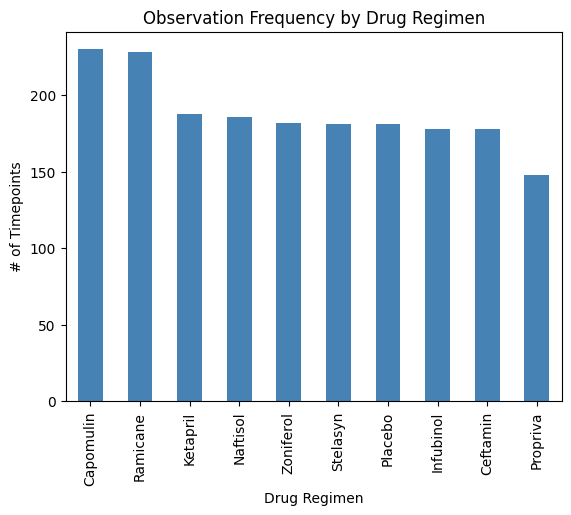

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = clean_study_data['Drug Regimen'].value_counts()
pandas_bar_plot = timepoint_counts.plot.bar(color='steelblue', width=0.5) 
plt.title('Observation Frequency by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')
plt.show()

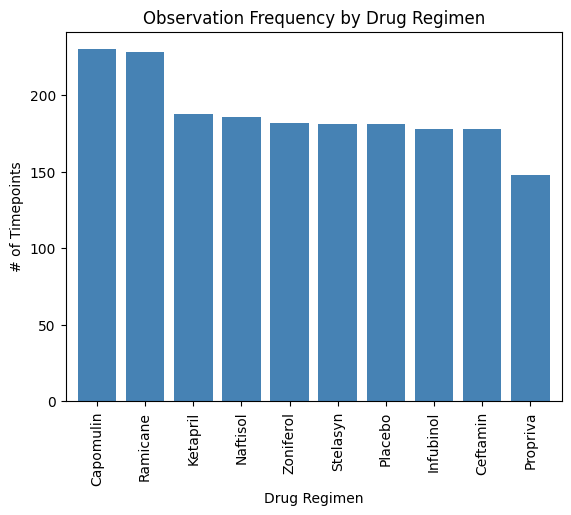

<Figure size 640x480 with 0 Axes>

In [81]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
matplotlib_bar_plot = timepoint_counts.plot(kind='bar', color='steelblue', width=0.8)
plt.title('Observation Frequency by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')
plt.xticks(rotation='vertical')
plt.show()
plt.tight_layout()

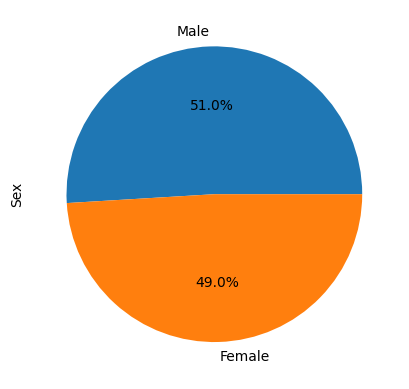

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_study_data["Sex"].value_counts()
gender_distribution.plot.pie(autopct='%1.1f%%', ylabel = 'Sex')
plt.show()

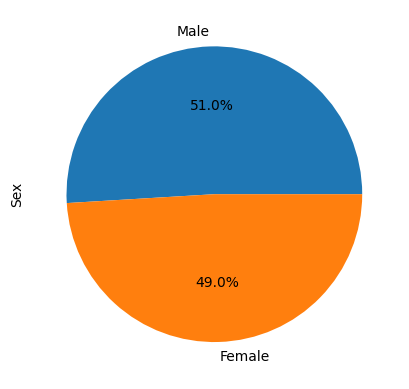

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution, autopct='%1.1f%%', labels = ('Male', 'Female'))
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_study_data = clean_study_data[clean_study_data['Drug Regimen'].isin(selected_drug_regimens)]
max_timepoint_data = filtered_study_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_data = pd.DataFrame.merge(max_timepoint_data, clean_study_data, on=['Mouse ID', 'Timepoint'], how="left" )


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
max_timepoints_grouped = clean_study_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume_stats = pd.merge(max_timepoints_grouped, clean_study_data, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

treatment_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for treatment in selected_drug_regimens:
    treatment_volume = final_tumor_volume_stats[final_tumor_volume_stats['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    treatment_volume_data.append(treatment_volume)

    quartiles = treatment_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr_value = upperq - lowerq

    lower_bound = lowerq - 1.5 * iqr_value
    upper_bound = upperq + 1.5 * iqr_value
    
    print(f"Treatment: {treatment}")
    print(f"IQR: {iqr_value}")
    print(f"Potential Outliers: {lower_bound, upper_bound}")


Treatment: Capomulin
IQR: 7.781863460000004
Potential Outliers: (20.70456164999999, 51.83201549)
Treatment: Ramicane
IQR: 9.098536719999998
Potential Outliers: (17.912664470000003, 54.30681135)
Treatment: Infubinol
IQR: 11.477135160000003
Potential Outliers: (36.83290494999999, 82.74144559000001)
Treatment: Ceftamin
IQR: 15.577752179999997
Potential Outliers: (25.355449580000002, 87.66645829999999)


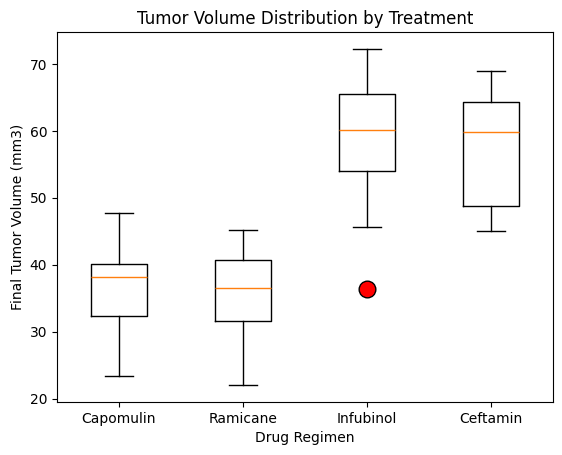

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(treatment_volume_data, labels=selected_drug_regimens, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 12})
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume Distribution by Treatment')
plt.show()

## Line and Scatter Plots

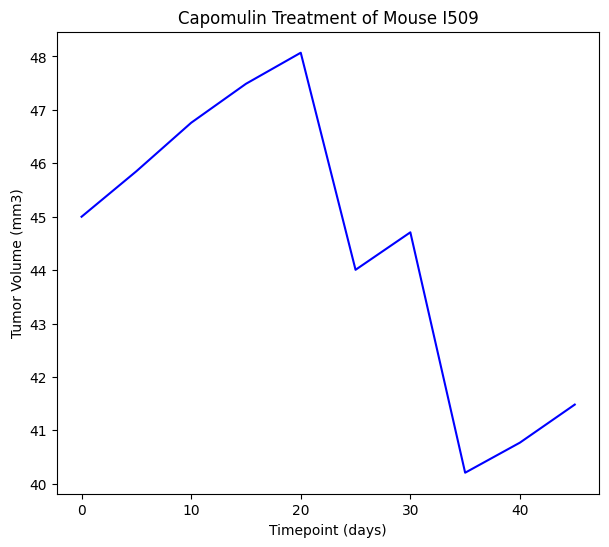

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_study_data = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']
chosen_mouse_id = capomulin_study_data['Mouse ID'].iloc[0]
mouse_specific_data = capomulin_study_data[capomulin_study_data['Mouse ID'] == "l509"]
plt.figure(figsize=(7, 6))
plt.plot(mouse_specific_data['Timepoint'], mouse_specific_data['Tumor Volume (mm3)'], color='blue', label=f'Mouse ID: {chosen_mouse_id}')
plt.title('Capomulin Treatment of Mouse I509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

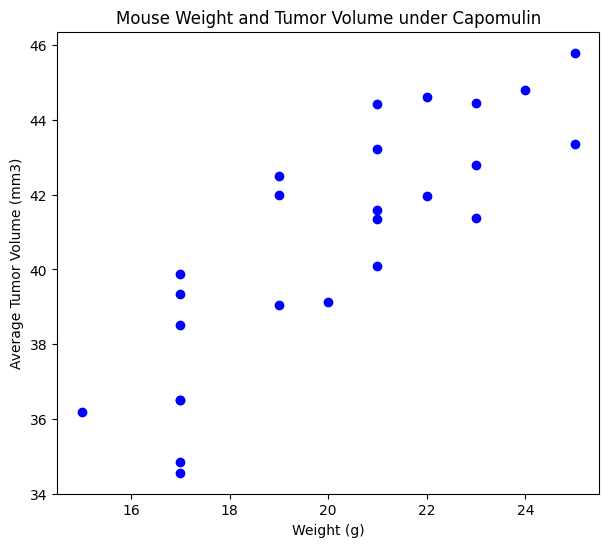

In [78]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = capomulin_study_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight_tumor_data = pd.merge(avg_tumor_vol, capomulin_study_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

plt.figure(figsize=(7, 6))
plt.scatter(weight_tumor_data['Weight (g)'], weight_tumor_data['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight and Tumor Volume under Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation between mouse weight and average tumor volume: 0.84
y = 0.95x + 21.55


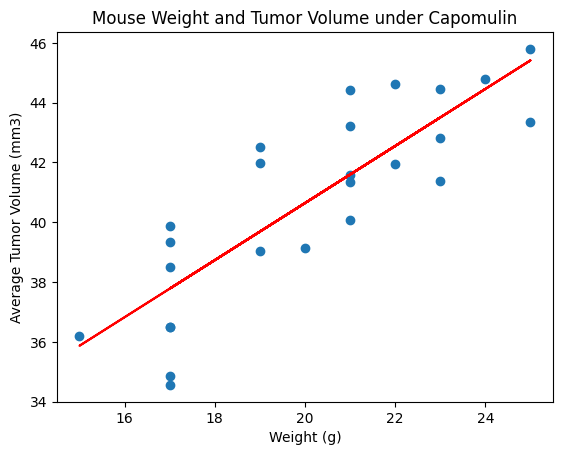

In [79]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coeff = st.pearsonr(weight_tumor_data["Weight (g)"], weight_tumor_data["Tumor Volume (mm3)"])
print(f"Correlation between mouse weight and average tumor volume: {round(correlation_coeff[0],2)}")

(slope_val, intercept_val, r_value, p_value, stderr_val) = st.linregress(weight_tumor_data["Weight (g)"], weight_tumor_data["Tumor Volume (mm3)"])

regression_values = weight_tumor_data["Weight (g)"] * slope_val + intercept_val

line_equation = "y = " + str(round(slope_val,2)) + "x + " + str(round(intercept_val,2))
print(line_equation)

plt.scatter(weight_tumor_data["Weight (g)"], weight_tumor_data["Tumor Volume (mm3)"])
plt.plot(weight_tumor_data["Weight (g)"], regression_values, "r-")
plt.title('Mouse Weight and Tumor Volume under Capomulin')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
